# Parsing JSON file in Python for "Phantom Data Analysis"

### Written by: Ashok Tiwari, PhD Candidate, Department of Radiology and Physics, University of Iowa,  
Date: 4/24/2020
#### Revised at: 05/31/2021

#### Thanks to Prof. John Sunderland, for providing the PET phantom data.


#### To make it comprehendible and to speed up the process, you can restart the kernel and re-run the whole code or cells in notebook. To execute all code cells in your notebook, click Run all (right hand facing double arrow head) on the Jupyter notebook toolbar or press Ctrl + Shift + Alt + Enter. 

In [17]:
import json
import pandas as pd
from pandas import DataFrame
from pandas.io.json import json_normalize

# To make a printed line bold
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

### The cells with # sign is the comment, code is self-explanatory.
To run this code step by step, click inside each cell then press: (shift + enter), or you can use Run command 

### Useful tips:
* Q. How to download Jupyter notebook and run this code?
* Go to: [Link here]("https://www.anaconda.com/distribution/") select Operating system and download it, then install the program, just follow the on-screen instructions
* Then you should be good to go.
* On MAC OS, click on lunchpad, choose Anaocnda Navigator, then find Jupyter Notebook and lunch it
* On Windows, typ Jupyter Notebook in search box near the start menu, then it should start
* After opening an application it should direct you to the browser

### Wait: Select a file for analysis using the dialog box 

In [20]:
import tkinter as tk
from tkinter import filedialog

window = tk.Tk()
window.wm_attributes('-topmost', 1)
window.withdraw()   # this supress the tk window, we don't need it

filename = filedialog.askopenfilename(parent=window,
                                      initialdir="",
                                      title="Select A File",
                                      filetypes = (("Text files", "*.txt"), ("JSON files", "*.json"), ("All files", "*")))
# Here, window.wm_attributes('-topmost', 1) and "parent=window" help open the dialog box on top of other windows

print(type(filename))

<class 'str'>


In [3]:
# Load JSON file in .txt file format and print headers info under a key (PETScanHeader) using the keywords in the JSON file

with open(filename) as json_file:          # filename is a string (str)
    data = json.load(json_file)            # data is now a dictionery
    #print(type(data))                     # to check data type

    #print(json.dumps(data, indent=2))
    printmd('**-----------------PET SCANNER, PHANTOM AND IMAGE INFORMATION---------------------**')
    print("Manufacturer:", data.get("PETScanHeader")['Manufacturer'])
    print("Scanner Model:", data.get("PETScanHeader")['ManufacturerModelName'])
    print("Reconstruction Method:", data.get("PETScanHeader")['ReconstructionMethod'])
    print("Phantom Type:", data.get("PhantomType"))
    
    print("Per Bed Duration:", data.get("PETScanHeader")['ActualFrameDuration'])
    print("X, Y Pixel Spacing (mm):", data.get("PETScanHeader")['PixelSpacing'])
    print("Slice Thickness (mm):", data.get("PETScanHeader")['SliceThickness'])
    print("X, Y array (dim):", data.get("PETScanHeader")['Rows'])
    
    print("Iterations:", data.get("PETScanHeader")['Iterations'])
    print("Subset:", data.get("PETScanHeader")['Subsets'])
    print("Gaussian (mm):", data.get("PETScanHeader")['GaussianFilter'])
    
    # Print headers info under a key (MetaData)

    printmd('**-----------------META DATA INFORMATION---------------------**')
    print("SNMMI Phantom Analysis Form:", data.get("MetaData")['SNMMIPhantomAnalysisForm'])
    print("Site Contact Name:", data.get("MetaData")['SNMMIPhantomAnalysisForm'])
    print("SNMMI Phantom Analysis Form:", data.get("MetaData")['Site Contact Name'])

    print("Background Activity Syringe (uCi):", data.get("MetaData")['Syringe 1 activity'])
    print("Background Syringe Time:", data.get("MetaData")['Syringe 1 assay time'])
    print("Background Syringe Residual Activity (uCi):", data.get("MetaData")['Syringe 1 Residual Activity'])
    print("Background Syringe Residual Time:", data.get("MetaData")['Syringe 1 Residual Activity Time'])
    print("Background Fill Volume (mL):", data.get("MetaData")['Full phantom Weight (g)'])

    print("Sphere Activity Syringe (uCi):", data.get("MetaData")['Syringe 2 activity'])
    print("Sphere Syringe Time:", data.get("MetaData")['Syringe 2 assay time'])
    print("Sphere Syringe Residual Activity (uCi):", data.get("MetaData")['Syringe 2 Residual Activity'])
    print("Sphere Syringe Residual Time:", data.get("MetaData")['Syringe 2 Residual Activity Time'])
    print("Sphere Solution Volume (mL):", data.get("MetaData")['Sphere Solution Volume (1000 g)'])

    print("Expected Contrast:", data.get("ExpectedContrast"))
    print("Software Name:", data.get("SoftwareName"))
    print("Software Version:", data.get("SoftwareVersion"))
    print("Software Date:", data.get("SoftwareDate"))


**-----------------PET SCANNER, PHANTOM AND IMAGE INFORMATION---------------------**

Manufacturer: GE MEDICAL SYSTEMS
Scanner Model: Discovery MI DR
Reconstruction Method: VPFX
Phantom Type: CTN
Per Bed Duration: 600000
X, Y Pixel Spacing (mm): [2.734375, 2.734375]
Slice Thickness (mm): 3.27
X, Y array (dim): 256
Iterations: 3
Subset: 32
Gaussian (mm): 6.0


**-----------------META DATA INFORMATION---------------------**

SNMMI Phantom Analysis Form: v.1.0
Site Contact Name: v.1.0
SNMMI Phantom Analysis Form: pscWebExport - owner: sunderland_staff
Background Activity Syringe (uCi): 958.0
Background Syringe Time: 14:41:00
Background Syringe Residual Activity (uCi): 104.0
Background Syringe Residual Time: 15:36:00
Background Fill Volume (mL): 9507.0
Sphere Activity Syringe (uCi): 969.0
Sphere Syringe Time: 14:38:00
Sphere Syringe Residual Activity (uCi): 31.0
Sphere Syringe Residual Time: 14:44:00
Sphere Solution Volume (mL): 1000.0
Expected Contrast: 10.44754695892334
Software Name: analyzeInsertPhantom
Software Version: 1.0.0
Software Date: 2018-06-01


In [4]:
# Pull out spehere ID's and diameters: using (software in-buit) Model key
# json_normalize is faster than 'for' statement
 
pd.set_option('display.max_columns', None)
#print("************** SPHERE ID, MODEL POSITION, AND DIAMETER **************")
#model_id = pd.json_normalize(data['Model'])
# It looks like the recent version of json file contains 'MeasurementModel' key instead of 'Model'
model_id = pd.json_normalize(data['MeasurementModel'])
# model_id   

# Let us round position values to 4 decimal places
    
# Create the dataframe
df = pd.DataFrame.from_dict(model_id)

# Flatten Positions with pd.series
df_p = df['Position'].apply(pd.Series)

df_p_0 = df_p[0].apply(pd.Series)
df_p_1 = df_p[1].apply(pd.Series)
df_p_2 = df_p[2].apply(pd.Series)

# Round position values to 4 decimal places
df_p_0 = round(df_p_0, 4)
df_p_1 = round(df_p_1, 4)
df_p_2 = round(df_p_2, 4)

# Rename Position[X, Y, Z] as:
df_p_0.columns = ['Pos_X']
df_p_1.columns = ['Pos_Y']
df_p_2.columns = ['Pos_Z']

df_new = pd.concat([df, df_p_0, df_p_1, df_p_2], axis=1)

# Drop the old column Position and visualize it
df_new = df_new.drop(columns=['Position'])

# Re-arrange columns 
df_new = df_new[['ModelPointId', 'Pos_X', 'Pos_Y', 'Pos_Z', 'Diameter', 'Type']]
printmd('**Table 1: Pos_X, Pos_Y and Pos_Z are centroids of the Model spheres**')
df_new


**Table 1: Pos_X, Pos_Y and Pos_Z are centroids of the Model spheres**

,ModelPointId,Pos_X,Pos_Y,Pos_Z,Diameter,Type
0,0,48.3359,12.7891,-418.0352,37.0,insert
1,1,22.6953,7.5234,-377.9853,28.0,insert
2,2,101.1953,-6.1797,-226.7559,22.0,insert
3,3,-0.7422,12.4297,-325.3555,17.0,insert
4,4,-1.7734,-8.4766,-259.9158,13.0,insert
5,5,-1.0391,-4.2734,-289.0757,10.0,insert
6,6,-3.5391,1.9297,-229.2159,7.0,insert
7,7,82.3203,7.4922,-350.0154,22.0,insert
8,8,-55.9297,14.6641,-295.4256,17.0,insert
9,9,-82.8047,-21.4141,-340.3955,13.0,insert


In [5]:
# Pull out phantom measurement spehere ID's and diameters: using MeasurementModel key (Transformed Position)
printmd('**Table 2: SPHERE ID, MEASUREMENT POSITION, DIAMETER, AND INSERT TYPE**')       
measurement_ids = pd.json_normalize(data, "MeasurementModel")    
#measurement_ids
    
# Create the dataframe
ef = pd.DataFrame.from_dict(measurement_ids)

# Flatten Positions with pd.series
ef_p = ef['Position'].apply(pd.Series)

ef_p_0 = ef_p[0].apply(pd.Series)
ef_p_1 = ef_p[1].apply(pd.Series)
ef_p_2 = ef_p[2].apply(pd.Series)

# Round position values to 4 decimal places
ef_p_0 = round(ef_p_0, 4)
ef_p_1 = round(ef_p_1, 4)
ef_p_2 = round(ef_p_2, 4)

# Rename Position[X, Y, Z] as:
ef_p_0.columns = ['Pos_X']
ef_p_1.columns = ['Pos_Y']
ef_p_2.columns = ['Pos_Z']

ef_new = pd.concat([ef, ef_p_0, ef_p_1, ef_p_2], axis=1)

# Drop the old column Position and visualize it
ef_new = ef_new.drop(columns=['Position'])

# Re-arrange columns 
ef_new = ef_new[['ModelPointId', 'Pos_X', 'Pos_Y', 'Pos_Z', 'Diameter', 'Type']]
print('**Note: Pos_X, Pos_Y and Pos_Z are centroids of the spheres**')
ef_new


**Table 2: SPHERE ID, MEASUREMENT POSITION, DIAMETER, AND INSERT TYPE**

**Note: Pos_X, Pos_Y and Pos_Z are centroids of the spheres**


,ModelPointId,Pos_X,Pos_Y,Pos_Z,Diameter,Type
0,0,48.3359,12.7891,-418.0352,37.0,insert
1,1,22.6953,7.5234,-377.9853,28.0,insert
2,2,101.1953,-6.1797,-226.7559,22.0,insert
3,3,-0.7422,12.4297,-325.3555,17.0,insert
4,4,-1.7734,-8.4766,-259.9158,13.0,insert
5,5,-1.0391,-4.2734,-289.0757,10.0,insert
6,6,-3.5391,1.9297,-229.2159,7.0,insert
7,7,82.3203,7.4922,-350.0154,22.0,insert
8,8,-55.9297,14.6641,-295.4256,17.0,insert
9,9,-82.8047,-21.4141,-340.3955,13.0,insert


In [6]:
# Let us check the JSON phantom key "Measurements"
measurements = pd.json_normalize(data['Measurements']) 

# let us check the index, columns and values of pandas Dataframe "measurements"
index = measurements.index
columns = measurements.columns
values = measurements.values
# columns   # to pull out Pull out columns headers name

# Let us set rows and columns of the data to be visualize, set each as 500. The default value is 10, i.e, if no number of 
# rows or columns are specified it will print only 10 rows

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Let's select all the columns -- ModelPointId, Diameter, IsInsert, Mean, etc. (see below)
# Let us read all data values in measurements; it is the block of all data values for all spheres. 
# We can pull out the data for individual spheres; see below for each spheres

# let us round the data for 4 decimal place, data [] are not numbers so special treatment should be done if we are interested!
# If you want to visualize all the data then uncomment following two lines
#print("********************* COLLECTIVE TABLE FOR SPHERE INSERTS AND BACKGROUND ROI'S FOR ALL DIAMETERS ************************")
#round(measurements[['ModelPointId', 'Center', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500', 'PeakLocation', 'Peak500Location']], 4)


In [7]:
# Data belong to sphere size 37 mm
# First column is the index

pd.set_option('display.max_rows', None)  # None is unlimited, default 10 rows
pd.set_option('display.max_columns', None)

df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 37.0 mm
printmd('**Table 3: STATISTICS OF 37 MM DIAMETER SPHERE**')
select_37mm = df.loc[(df['Diameter'] == 37.0) & (df['IsInsert'] == False)]
select_37mm

**Table 3: STATISTICS OF 37 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
12,12,37.0,False,1.1774,0.1886,1.7673,1.4000,1.4373
19,13,37.0,False,1.1787,0.1948,1.8401,1.4001,1.4352
26,14,37.0,False,1.1567,0.1758,1.6921,1.4385,1.4878
33,15,37.0,False,1.1830,0.1718,1.7957,1.4446,1.5157
40,16,37.0,False,1.3826,0.2193,2.1062,1.5988,1.6833
47,17,37.0,False,1.2527,0.1816,1.8844,1.4981,1.5441
54,18,37.0,False,1.2253,0.1825,1.7673,1.4285,1.4891
61,19,37.0,False,1.2328,0.2041,1.8401,1.4098,1.4566
68,20,37.0,False,1.2562,0.2107,2.0027,1.5320,1.6433
75,21,37.0,False,1.1543,0.1359,1.6036,1.3283,1.3637


In [8]:
pd.set_option('display.max_rows', None)  # None is unlimited, default 10 rows
pd.set_option('display.max_columns', None)

df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 28.0 mm
printmd('**Table 4: STATISTICS OF 28 MM DIAMETER SPHERE**')
select_28mm = df.loc[(df['Diameter'] == 28.0) & (df['IsInsert'] == False)]

select_28mm

**Table 4: STATISTICS OF 28 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
13,12,28.0,False,1.1667,0.1976,1.7510,1.3263,1.3605
20,13,28.0,False,1.1730,0.2099,1.7490,1.3650,1.3998
27,14,28.0,False,1.1601,0.1869,1.6638,1.3462,1.3745
34,15,28.0,False,1.1713,0.1704,1.6613,1.3392,1.3760
41,16,28.0,False,1.3943,0.2168,1.9913,1.5608,1.6001
48,17,28.0,False,1.2345,0.1809,1.8455,1.4038,1.4326
55,18,28.0,False,1.2146,0.1830,1.7673,1.3890,1.4373
62,19,28.0,False,1.2288,0.2087,1.7490,1.4001,1.4182
69,20,28.0,False,1.2579,0.2188,2.0027,1.5320,1.6433
76,21,28.0,False,1.1504,0.1381,1.5914,1.3329,1.3628


In [9]:
pd.set_option('display.max_rows', None)  # None is unlimited, default 10 rows
pd.set_option('display.max_columns', None)

df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 22.0 mm
printmd('**Table 5: STATISTICS OF 22 MM DIAMETER SPHERE**')
select_22mm = df.loc[(df['Diameter'] == 22.0) & (df['IsInsert'] == False)]

select_22mm

**Table 5: STATISTICS OF 22 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
14,12,22.0,False,1.1598,0.2006,1.6325,1.2993,1.3249
21,13,22.0,False,1.1581,0.2223,1.7490,1.3589,1.3998
28,14,22.0,False,1.1442,0.1949,1.6544,1.3101,1.3745
35,15,22.0,False,1.1663,0.1773,1.5942,1.3032,1.3266
42,16,22.0,False,1.3743,0.2380,1.8789,1.5182,1.5694
49,17,22.0,False,1.2103,0.1694,1.5437,1.3516,1.3572
56,18,22.0,False,1.2032,0.1808,1.7673,1.3355,1.3530
63,19,22.0,False,1.2344,0.2210,1.7302,1.3873,1.4135
70,20,22.0,False,1.2819,0.2350,2.0027,1.5320,1.6433
77,21,22.0,False,1.1537,0.1466,1.5827,1.3065,1.3554


In [10]:
df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 17.0 mm
printmd('**Table 6: STATISTICS OF 17 MM DIAMETER SPHERE**')
select_17mm = df.loc[(df['Diameter'] == 17.0) & (df['IsInsert'] == False)]

select_17mm

**Table 6: STATISTICS OF 17 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
15,12,17.0,False,1.1451,0.2200,1.6325,1.2657,1.3249
22,13,17.0,False,1.1352,0.2471,1.7490,1.2961,1.3165
29,14,17.0,False,1.1209,0.2067,1.5222,1.3101,1.3745
36,15,17.0,False,1.1661,0.1890,1.4638,1.2656,1.2908
43,16,17.0,False,1.3500,0.2310,1.8785,1.4775,1.5280
50,17,17.0,False,1.2007,0.1583,1.5009,1.2920,1.3052
57,18,17.0,False,1.1897,0.1876,1.7452,1.2889,1.3165
64,19,17.0,False,1.2418,0.2341,1.6855,1.3650,1.3998
71,20,17.0,False,1.3243,0.2673,2.0027,1.5320,1.6433
78,21,17.0,False,1.1382,0.1590,1.5827,1.2438,1.2651


In [11]:
df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 13.0 mm
printmd('**Table 7: STATISTICS OF 13 MM DIAMETER SPHERE**')
select_13mm = df.loc[(df['Diameter'] == 13.0) & (df['IsInsert'] == False)]

select_13mm

**Table 7: STATISTICS OF 13 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
16,12,13.0,False,1.1029,0.2598,1.6325,1.2033,1.2415
23,13,13.0,False,1.1063,0.2411,1.5056,1.2478,1.2405
30,14,13.0,False,1.1005,0.2255,1.5091,1.2769,1.2966
37,15,13.0,False,1.1758,0.2177,1.4638,1.2725,1.2908
44,16,13.0,False,1.3241,0.2468,1.7762,1.4625,1.5112
51,17,13.0,False,1.1899,0.1833,1.5009,1.2719,1.3036
58,18,13.0,False,1.1813,0.2041,1.5235,1.2664,1.2884
65,19,13.0,False,1.2532,0.2453,1.6387,1.3400,1.3683
72,20,13.0,False,1.3593,0.3041,2.0027,1.5395,1.6433
79,21,13.0,False,1.1112,0.1450,1.3680,1.2220,1.2215


In [12]:
df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 13.0 mm
printmd('**Table 8: STATISTICS OF 10 MM DIAMETER SPHERE**')
select_10mm = df.loc[(df['Diameter'] == 10.0) & (df['IsInsert'] == False)]

select_10mm

**Table 8: STATISTICS OF 10 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
17,12,10.0,False,1.0501,0.2802,1.6325,1.1777,1.2052
24,13,10.0,False,1.0765,0.2377,1.3880,1.2088,1.2003
31,14,10.0,False,1.0740,0.2154,1.3733,1.2093,1.2353
38,15,10.0,False,1.1934,0.2531,1.4638,1.2473,1.2828
45,16,10.0,False,1.2790,0.2784,1.7762,1.3987,1.4079
52,17,10.0,False,1.1769,0.2076,1.5009,1.2532,1.2657
59,18,10.0,False,1.1673,0.2224,1.5235,1.2371,1.2666
66,19,10.0,False,1.2710,0.2531,1.6387,1.3143,1.3683
73,20,10.0,False,1.3787,0.3612,2.0027,1.4827,1.5691
80,21,10.0,False,1.0895,0.1403,1.3062,1.1745,1.1534


In [13]:
df = round(measurements[['ModelPointId', 'Diameter', 'IsInsert', 'Mean', 'StdDev', 'Max', 'Peak', 'Peak500']], 4)

# Select rows where the diameter of the sphere is 13.0 mm
printmd('**Table 9: STATISTICS OF 7 MM DIAMETER SPHERE**')
select_7mm = df.loc[(df['Diameter'] == 7.0) & (df['IsInsert'] == False)]

select_7mm

**Table 9: STATISTICS OF 7 MM DIAMETER SPHERE**

,ModelPointId,Diameter,IsInsert,Mean,StdDev,Max,Peak,Peak500
18,12,7.0,False,1.0156,0.2410,1.6325,1.1617,1.1977
25,13,7.0,False,1.0636,0.1796,1.2766,1.1500,1.1299
32,14,7.0,False,1.0363,0.1907,1.2990,1.1378,1.1326
39,15,7.0,False,1.2161,0.2626,1.3535,1.2519,1.2828
46,16,7.0,False,1.2324,0.1744,1.5125,1.3905,1.4138
53,17,7.0,False,1.2045,0.1553,1.5009,1.2412,1.2619
60,18,7.0,False,1.1386,0.2022,1.5235,1.2239,1.2530
67,19,7.0,False,1.2971,0.3271,1.6387,1.3076,1.3271
74,20,7.0,False,1.3152,0.2648,1.8486,1.4545,1.5154
81,21,7.0,False,1.0767,0.1261,1.2110,1.1324,1.1313


In [14]:
# background mean per sphere diameter
BackgroundMeanPerDiameter = pd.json_normalize(data['BackgroundMeanPerDiameter'])
ContrastRecoveryToNoiseRatios = pd.json_normalize(data['ContrastRecoveryToNoiseRatios'])

BackgroundMeanPerDiameter = BackgroundMeanPerDiameter.rename(index={0: "RCMean"})
BackgroundMeanPerDiameter = BackgroundMeanPerDiameter.transpose()

ContrastRecoveryToNoiseRatios = ContrastRecoveryToNoiseRatios.rename(index={0: "ContrastRecoveryToNoiseRatio"})
ContrastRecoveryToNoiseRatios = ContrastRecoveryToNoiseRatios.transpose()

output = pd.concat([BackgroundMeanPerDiameter, ContrastRecoveryToNoiseRatios], axis=1, sort=False)
printmd('**Table 10: RC mean & Contrast Recovery To Noise Ratio**')

output


**Table 10: RC mean & Contrast Recovery To Noise Ratio**

,RCMean,ContrastRecoveryToNoiseRatio
7,1.128097,0.793568
10,1.141656,2.588100
13,1.166577,3.757512
17,1.186318,4.598321
22,1.202161,5.194744
28,1.216627,5.907841
37,1.221869,5.613082


In [15]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

A = pd.json_normalize(data['RecoveryCoefficentsMean'])
B = pd.json_normalize(data['ContrastRecoveryCoefficentsMean'])
C = pd.json_normalize(data['RecoveryCoefficentsMax'])
D = pd.json_normalize(data['ContrastRecoveryCoefficentsMax'])
E = pd.json_normalize(data['RecoveryCoefficentsPeak'])
F = pd.json_normalize(data['ContrastRecoveryCoefficentsPeak'])
G = pd.json_normalize(data['RecoveryCoefficentsPeak500'])
H = pd.json_normalize(data['ContrastRecoveryCoefficentsPeak500'])

A = A.rename(index={0: "RCMean"})
A = A.transpose()

B = B.rename(index={0: "CRCMean"})
B = B.transpose()

C = C.rename(index={0: "RCMax"})
C = C.transpose()

D = D.rename(index={0: "CRCMax"})
D = D.transpose()

E = E.rename(index={0: "RCPeak"})
E = E.transpose()

F = F.rename(index={0: "CRCPeak"})
F = F.transpose()

G = G.rename(index={0: "RCPeak500"})
G = G.transpose()

H = H.rename(index={0: "CRCPeak500"})
H = H.transpose()
             
result = pd.concat([A, B, C, D, E, F, G, H], axis=1, sort=False)
printmd('**Table 11: STATISTICS IN TABULAR FORM**')
printmd('Note: Upper 37-7 mm sphere data in table are for uniform background, and lower 22-10 mm for lung background')
# Add diameter (mm) information
# Indexes 0, 1, 2, ....11 are respectively 37, 28, 22, 17, 13, 10, 7, 22, 17, 13, 10, 10 mm spheres
# Rename the index numbers by spheres diameters

result.index = [37, 28, 22, 17, 13, 10, 7, 22, 17, 13, 10, 10]
result


**Table 11: STATISTICS IN TABULAR FORM**

Note: Upper 37-7 mm sphere data in table are for uniform background, and lower 22-10 mm for lung background

,RCMean,CRCMean,RCMax,CRCMax,RCPeak,CRCPeak,RCPeak500,CRCPeak500
37,0.626730,0.587220,0.826013,0.807596,0.770045,0.745705,0.778598,0.755163
28,0.595728,0.552937,0.822095,0.803264,0.752121,0.725884,0.771180,0.746960
22,0.516259,0.465056,0.725447,0.696387,0.661438,0.625602,0.678396,0.644355
17,0.462529,0.405639,0.655195,0.618699,0.546710,0.498731,0.586486,0.542717
13,0.410498,0.348101,0.625574,0.585942,0.412356,0.350155,0.474820,0.419231
10,0.335031,0.264646,0.456483,0.398953,0.284223,0.208459,0.331266,0.260482
7,0.178849,0.091932,0.232414,0.151166,0.147571,0.057344,0.166050,0.077779
22,0.528518,0.478613,0.794111,0.772318,0.696329,0.664186,0.725020,0.695914
17,0.453719,0.395896,0.658269,0.622098,0.550106,0.502486,0.595288,0.552450
13,0.355930,0.287757,0.522386,0.471832,0.355031,0.286763,0.407329,0.344596


<Figure size 432x288 with 0 Axes>

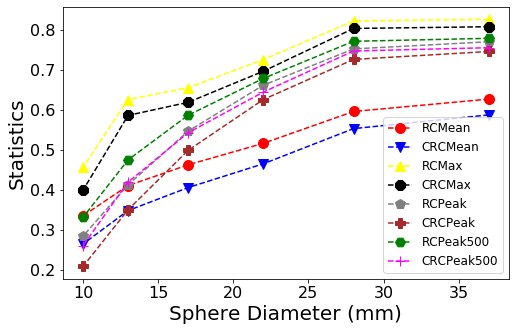

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure()
plt.figure(figsize=(8,5))
x = 37, 28, 22, 17, 13, 10
y =  A[0:6]                  # A is Recovery Ceofficient Mean from above table
y1 = B[0:6]
y2 = C[0:6]
y3 = D[0:6]
y4 = E[0:6]
y5 = F[0:6]
y6 = G[0:6]
y7 = H[0:6]

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Sphere Diameter (mm)',fontsize=20)
plt.ylabel('Statistics',fontsize=20)

plt.plot(x, y, label='RCMean', color='red', linestyle='dashed', marker='o', markersize=10)
plt.plot(x, y1, label='CRCMean', color='blue', linestyle='dashed', marker='v', markersize=10)
plt.plot(x, y2, label='RCMax', color='yellow', linestyle='dashed', marker='^', markersize=10)
plt.plot(x, y3, label='CRCMax', color='black', linestyle='dashed', marker='8', markersize=10)
plt.plot(x, y4, label='RCPeak', color='grey', linestyle='dashed', marker='p', markersize=10)
plt.plot(x, y5, label='CRCPeak', color='brown', linestyle='dashed', marker='P', markersize=10)
plt.plot(x, y6, label='RCPeak500', color='green', linestyle='dashed', marker='H', markersize=10)
plt.plot(x, y7, label='CRCPeak500', color='magenta', linestyle='dashed', marker='+', markersize=10)

plt.legend(loc='lower right',prop={'size': 12})
#plt.title('Statistics vs. sphere diameter', fontsize=16 )
#plt.grid(True)